In [1]:
# Evaluation notebook for kNN-based job recommendations using session embeddings

import os
#import pickle
import pandas as pd
import numpy as np
#from sklearn.metrics.pairwise import cosine_similarity
#from tqdm import tqdm
import matplotlib.pyplot as plt

#from collections import Counter

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path =  "../../data/"
dataset = "cb12/"

evaluation_path = path + dataset + "evaluation/"

In [3]:
final_df = pd.read_csv(evaluation_path+"summary_all_metrics.csv")
final_df.head()

nDCG_next  MRR_next  EPC_next      EPD_next  nDCG_remaining  MRR_remaining  \
0   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
1   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
2   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
3   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
4   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   

   EPC_remaining  EPD_remaining encoder_type  top_n   k  CatalogCoverage (%)  \
0       0.045614       0.021597           ae     20  10                 9.27   
1       0.045614       0.021597           ae     19  10                 9.27   
2       0.045614       0.021597           ae     18  10                 9.27   
3       0.045614       0.021597           ae     17  10                 9.27   
4       0.045614       0.021597           ae     16  10                 9.27   

   TestsetCoverage (%)  
0                58.86  
1                58.86  
2                58.86  
3                58.86  
4                58.86

In [4]:
final_df.describe()

nDCG_next    MRR_next    EPC_next      EPD_next  nDCG_remaining  \
count  600.000000  600.000000  600.000000  6.000000e+02      600.000000   
mean     0.027381    0.021324    0.000691 -6.706423e-21        0.169619   
std      0.005774    0.002899    0.000609  1.695164e-20        0.045129   
min      0.011243    0.011243    0.000103 -8.009953e-20        0.057132   
25%      0.024418    0.020168    0.000304 -9.555899e-21        0.145845   
50%      0.028729    0.022022    0.000443 -2.421486e-21        0.181358   
75%      0.031818    0.023588    0.000804  2.105743e-22        0.205734   
max      0.035814    0.024843    0.002591  5.771569e-20        0.229394   

       MRR_remaining  EPC_remaining  EPD_remaining       top_n           k  \
count     600.000000     600.000000     600.000000  600.000000  600.000000   
mean        0.193606       0.012567       0.005878   10.500000   55.000000   
std         0.014401       0.011125       0.005201    5.771093   28.746779   
min         0.140237       0.001302       0.000552    1.000000   10.000000   
25%         0.183040       0.005546       0.002608    5.750000   30.000000   
50%         0.194874       0.008200       0.003827   10.500000   55.000000   
75%         0.203386       0.014900       0.006989   15.250000   80.000000   
max         0.222941       0.045614       0.021597   20.000000  100.000000   

       CatalogCoverage (%)  TestsetCoverage (%)  
count           600.000000           600.000000  
mean              8.397900            55.455467  
std               3.700452            15.840713  
min               1.450000            15.840000  
25%               5.827500            46.940000  
50%               8.640000            59.350000  
75%              10.730000            68.160000  
max              15.550000            76.080000

# Plots

## Compare with Lacic plots from his paper

In [5]:
# -------------------------------
# Compare with Lacic plots from his paper
# -------------------------------


### Fig. 5

In [6]:
"""
The fgures show the infuence of the neighborhood size k for picking top-k similar sessions when
comparing the three autoencoder variations on both interaction data and combined data. We find that the
recommendation accuracy converges when k is picked to be around 60 or more
"""

'\nThe fgures show the infuence of the neighborhood size k for picking top-k similar sessions when\ncomparing the three autoencoder variations on both interaction data and combined data. We find that the\nrecommendation accuracy converges when k is picked to be around 60 or more\n'

In [7]:
import matplotlib.pyplot as plt

# Filter DataFrame for rows where top_n == 20
filtered_df = final_df[final_df['top_n'] == 20]

In [8]:
filtered_df.head()

nDCG_next  MRR_next  EPC_next      EPD_next  nDCG_remaining  \
0    0.026155  0.020224  0.002303 -8.695465e-21        0.185111   
20   0.032835  0.022553  0.001446 -2.422517e-21        0.224688   
40   0.033449  0.022928  0.000981 -4.275096e-21        0.225081   
60   0.033176  0.022552  0.000730 -4.976307e-21        0.224971   
80   0.033168  0.022545  0.000584 -3.943521e-21        0.224851   

    MRR_remaining  EPC_remaining  EPD_remaining encoder_type  top_n   k  \
0        0.197461       0.045614       0.021597           ae     20  10   
20       0.175207       0.030532       0.014489           ae     20  20   
40       0.176036       0.020622       0.009813           ae     20  30   
60       0.175098       0.015485       0.007373           ae     20  40   
80       0.174962       0.012380       0.005894           ae     20  50   

    CatalogCoverage (%)  TestsetCoverage (%)  
0                  9.27                58.86  
20                15.55                72.41  
40                15.51                72.08  
60                15.51                72.08  
80                15.51                72.08

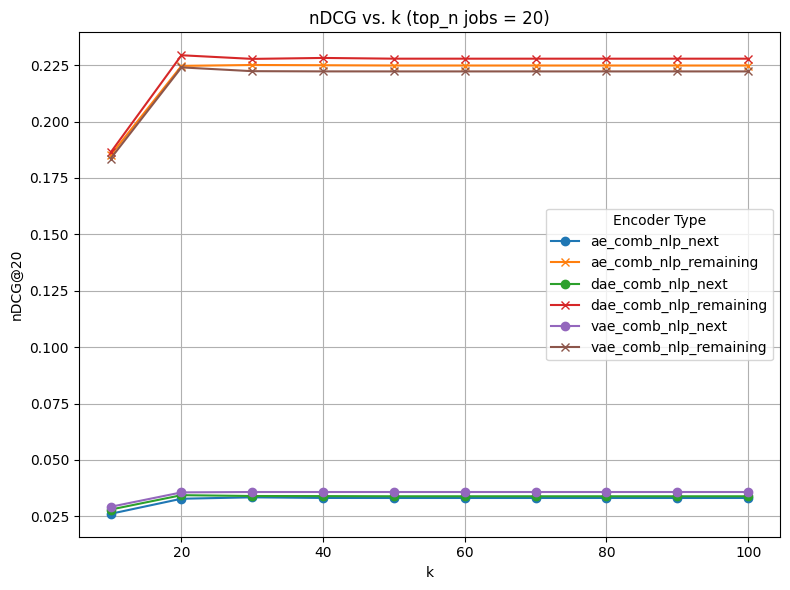

In [9]:
# Set up the plot
plt.figure(figsize=(8, 6))

# Plot one line per encoder_type
for encoder in filtered_df['encoder_type'].unique():
    subset = filtered_df[filtered_df['encoder_type'] == encoder]
    plt.plot(subset['k'], subset['nDCG_next'], marker='o', label=encoder+"_comb_nlp_next")  # 'D' is for diamond (losange)
    
    plt.plot(subset['k'], subset['nDCG_remaining'], marker='x', label=encoder+"_comb_nlp_remaining")  # 'D' is for diamond (losange)

# Customize plot
plt.title('nDCG vs. k (top_n jobs = 20)')
plt.xlabel('k')
plt.ylabel('nDCG@20')
plt.legend(title='Encoder Type')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


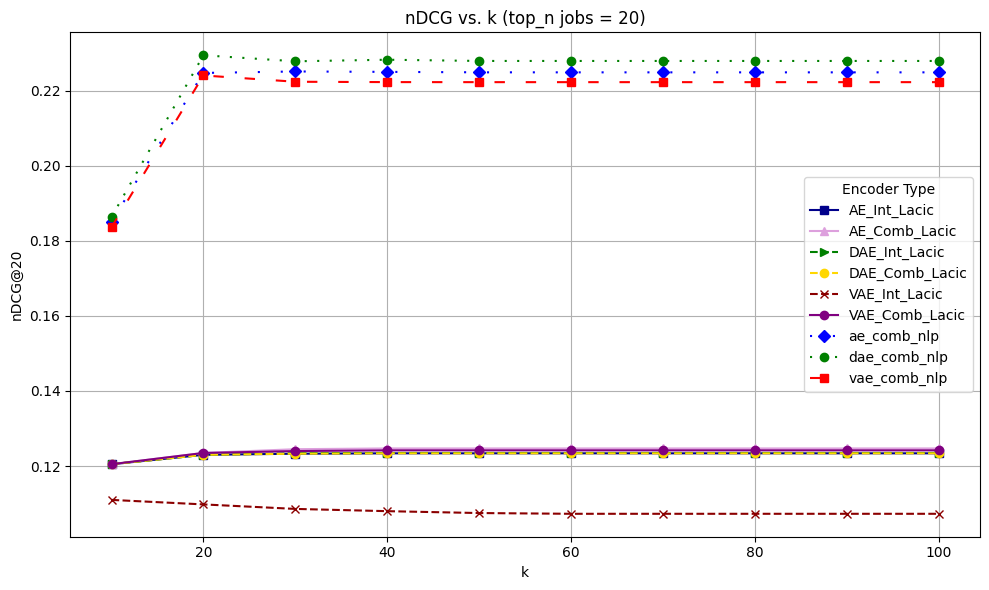

In [10]:
long_df = pd.read_csv(r"../../data/Lacic/Synthetic_EPC_Data_fig_5.csv")

# Split sets
filtered_df_Lacic = long_df
filtered_df = filtered_df

# Custom styles for Lacic data
custom_styles_lacic = {
    'AE_Comb': {'color': 'plum', 'marker': '^', 'linestyle': '-'},
    'VAE_Comb': {'color': 'purple', 'marker': 'o', 'linestyle': '-'},
    'DAE_Int': {'color': 'green', 'marker': '>', 'linestyle': '--'},
    'AE_Int': {'color': 'darkblue', 'marker': 's', 'linestyle': '-'},
    'DAE_Comb': {'color': 'gold', 'marker': 'o', 'linestyle': '--'},
    'VAE_Int': {'color': 'darkred', 'marker': 'x', 'linestyle': '--'},
}

# Dash styles for comb_nlp (filtered_df)
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]

# Plot
plt.figure(figsize=(10, 6))

# Plot Lacic with specific colors, markers, linestyles
for encoder in filtered_df_Lacic['encoder_type'].unique():
    subset = filtered_df_Lacic[filtered_df_Lacic['encoder_type'] == encoder]
    style = custom_styles_lacic.get(encoder, {'color': 'gray', 'marker': '.', 'linestyle': '-'})
    plt.plot(
        subset['k'], subset['nDCG'],
        label=encoder + "_Lacic",
        color=style['color'],
        marker=style['marker'],
        linestyle=style['linestyle']
    )

# Markers, colors, and linestyles
markers = ['D', 'o', 's', '^', 'v', '*']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]
    
# Plot NLP/Comb versions (custom dash styles)
for i, encoder in enumerate(filtered_df['encoder_type'].unique()):
    subset = filtered_df[filtered_df['encoder_type'] == encoder]
    plt.plot(
        subset['k'], subset['nDCG_remaining'],
        label=encoder + "_comb_nlp",
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        linestyle=custom_linestyles[i % len(custom_linestyles)]
    )

# Beautify
plt.title('nDCG vs. k (top_n jobs = 20)')
plt.xlabel('k')
plt.ylabel('nDCG@20')
plt.grid(True)
plt.legend(title='Encoder Type')
plt.tight_layout()

# Save the plot
plt.savefig("Fig_5.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()


### REMAINING JOBS

#### Table 4

In [11]:
"""
Table 4 Prediction results (k = 20) of remaining jobs that will be subject to interaction within a session.
(Color table online)
"""

'\nTable 4 Prediction results (k = 20) of remaining jobs that will be subject to interaction within a session.\n(Color table online)\n'

In [12]:
subset_df = final_df[(final_df["top_n"] == 20) & (final_df["k"] == 60)]
display(subset_df)

nDCG_next  MRR_next  EPC_next      EPD_next  nDCG_remaining  \
100   0.033168  0.022545  0.000487 -3.286267e-21        0.224844   
300   0.033918  0.024090  0.000497  7.247046e-22        0.227878   
500   0.035814  0.024843  0.000529 -1.191804e-20        0.222234   

     MRR_remaining  EPC_remaining  EPD_remaining encoder_type  top_n   k  \
100       0.174954       0.010316       0.004911           ae     20  60   
300       0.180161       0.010399       0.004951          dae     20  60   
500       0.174880       0.010020       0.004697          vae     20  60   

     CatalogCoverage (%)  TestsetCoverage (%)  
100                15.51                72.08  
300                10.71                72.82  
500                15.40                76.08

### NEXT JOB PREDICTION PROBLEM

#### Fig. 8

In [13]:
"""
Fig. 8 nDCG results for diferent recommendation list sizes (i.e., values of k) when predicting the next
job in the session. On all three datasets, both our proposed VAE approaches achieve competitive results
concerning accuracy (i.e., nDCG) metrics
"""

'\nFig. 8 nDCG results for diferent recommendation list sizes (i.e., values of k) when predicting the next\njob in the session. On all three datasets, both our proposed VAE approaches achieve competitive results\nconcerning accuracy (i.e., nDCG) metrics\n'

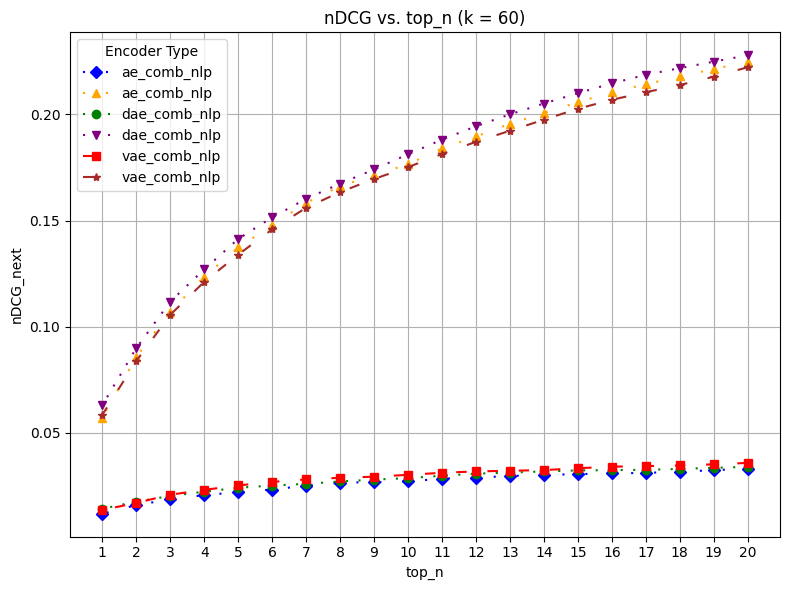

In [14]:
import matplotlib.pyplot as plt

# Filter data for k = 60
filtered_k60 = final_df[final_df["k"] == 60]

# Set up the plot
plt.figure(figsize=(8, 6))

# Markers, colors, and linestyles
markers = ['D', 'o', 's', '^', 'v', '*']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]

# Plot one line per encoder_type
for i, encoder in enumerate(filtered_k60["encoder_type"].unique()):
    subset = filtered_k60[filtered_k60["encoder_type"] == encoder]
    plt.plot(subset["top_n"], subset["nDCG_next"],
             label=encoder + "_comb_nlp",
             marker=markers[i % len(markers)],
             color=colors[i % len(colors)],
             linestyle=custom_linestyles[i % len(custom_linestyles)]
            )
    plt.plot(subset["top_n"], subset["nDCG_remaining"],
             label=encoder + "_comb_nlp",
             marker=markers[(i+3) % len(markers)],
             color=colors[(i+3) % len(colors)],
             linestyle=custom_linestyles[(i+3) % len(custom_linestyles)]
            )
    
# Customize plot
plt.title('nDCG vs. top_n (k = 60)')
plt.xlabel('top_n')
plt.ylabel('nDCG_next')
plt.xticks(range(1, 21, 1))  # Force x-axis ticks from 1 to 20
plt.legend(title='Encoder Type')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [15]:
Fig_8_lacic = pd.read_csv(r'../../data/Lacic/Synthetic_Baseline_Methods__k_60_.csv')
print(Fig_8_lacic['encoder_type'].unique())
print("len(Fig_8_lacic)")
print(len(Fig_8_lacic))
Fig_8_lacic

['VAE_Comb' 'VAE_Int' 'Bayes' 'sKNN' 'iKNN' 'S-sKNN' 'V-sKNN' 'GRU4Rec'
 'POP' 'BPR-MF' 'pRNN']
len(Fig_8_lacic)
220


k encoder_type   nDCG  top_n
0    60     VAE_Comb  0.025      1
1    60     VAE_Comb  0.035      2
2    60     VAE_Comb  0.042      3
3    60     VAE_Comb  0.050      4
4    60     VAE_Comb  0.056      5
..   ..          ...    ...    ...
215  60         pRNN  0.004     16
216  60         pRNN  0.004     17
217  60         pRNN  0.004     18
218  60         pRNN  0.004     19
219  60         pRNN  0.004     20

[220 rows x 4 columns]

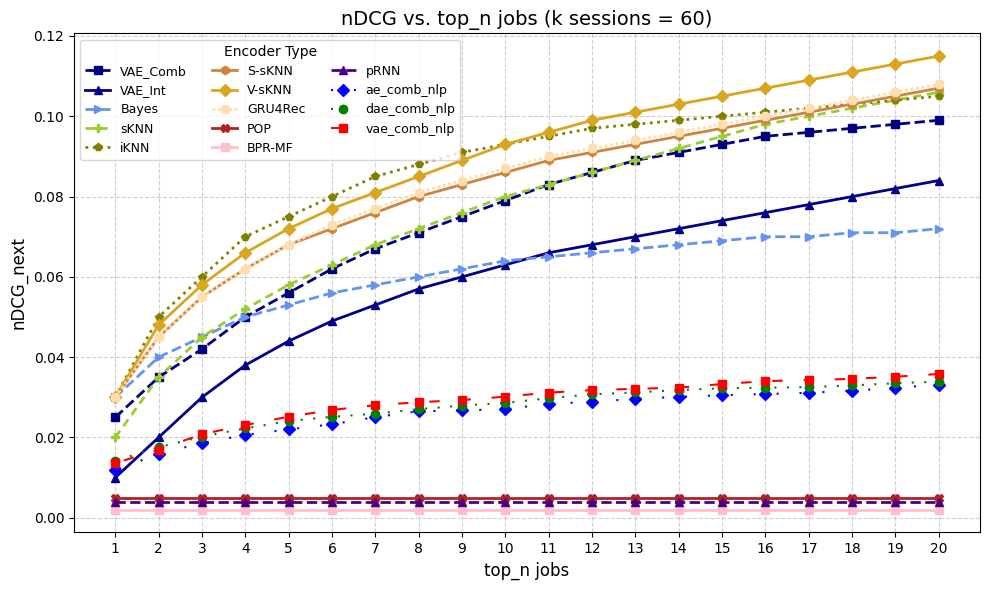

In [16]:
import matplotlib.pyplot as plt

# Filter data for k = 60
Fig_8_lacic = Fig_8_lacic #final_df[final_df["k"] == 60]

# Set up the plot
plt.figure(figsize=(10, 6))

# Define custom styles like in the image
custom_styles = {
    "VAE_Comb":     {'marker': 's', 'linestyle': '--', 'color': 'navy'},
    "VAE_Int":      {'marker': '^', 'linestyle': '-',  'color': 'darkblue'},
    "Bayes":        {'marker': '>', 'linestyle': '--', 'color': 'cornflowerblue'},
    "sKNN":         {'marker': 'P', 'linestyle': (0, (3, 2)), 'color': 'yellowgreen'},
    "iKNN":         {'marker': 'p', 'linestyle': ':',  'color': 'olive'},
    "S-sKNN":       {'marker': 'h', 'linestyle': '-',  'color': 'peru'},
    "V-sKNN":       {'marker': 'D', 'linestyle': '-',  'color': 'goldenrod'},
    "GRU4Rec":      {'marker': '8', 'linestyle': (0, (1, 1)), 'color': 'navajowhite'},
    "POP":          {'marker': 'X', 'linestyle': '-',  'color': 'firebrick'},
    "BPR-MF":       {'marker': 's', 'linestyle': '-',  'color': 'pink'},
    "pRNN":         {'marker': '^', 'linestyle': '--', 'color': 'indigo'}
}

# Plot each encoder_type with style
for encoder in Fig_8_lacic["encoder_type"].unique():
    subset = Fig_8_lacic[Fig_8_lacic["encoder_type"] == encoder]
    style = custom_styles.get(encoder, {'marker': 'o', 'linestyle': '-', 'color': 'black'})
    plt.plot(
        subset["top_n"], subset["nDCG"],
        label=encoder,
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        linewidth=2
    )

# Markers, colors, and linestyles
markers = ['D', 'o', 's', '^', 'v', '*']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]

# Plot one line per encoder_type
for i, encoder in enumerate(filtered_k60["encoder_type"].unique()):
    subset = filtered_k60[filtered_k60["encoder_type"] == encoder]
    plt.plot(subset["top_n"], subset["nDCG_next"],
             label=encoder + "_comb_nlp",
             marker=markers[i % len(markers)],
             color=colors[i % len(colors)],
             linestyle=custom_linestyles[i % len(custom_linestyles)]
            )
    
# Axis & legend styling
plt.title('nDCG vs. top_n jobs (k sessions = 60)', fontsize=14)
plt.xlabel('top_n jobs', fontsize=12)
plt.ylabel('nDCG_next', fontsize=12)
plt.xticks(range(1, 21, 1))  # Show ticks from 1 to 20
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Encoder Type', fontsize=9, title_fontsize=10, ncol=3, loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig("Fig_8.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()


#### Fig. 9

In [17]:
"""
EPC results for diferent recommendation list sizes (i.e., values of k) when predicting the next job
in the session. On all three datasets, both our proposed VAE approaches achieve good results concerning
beyond-accuracy (i.e., EPC) metrics
"""

'\nEPC results for diferent recommendation list sizes (i.e., values of k) when predicting the next job\nin the session. On all three datasets, both our proposed VAE approaches achieve good results concerning\nbeyond-accuracy (i.e., EPC) metrics\n'

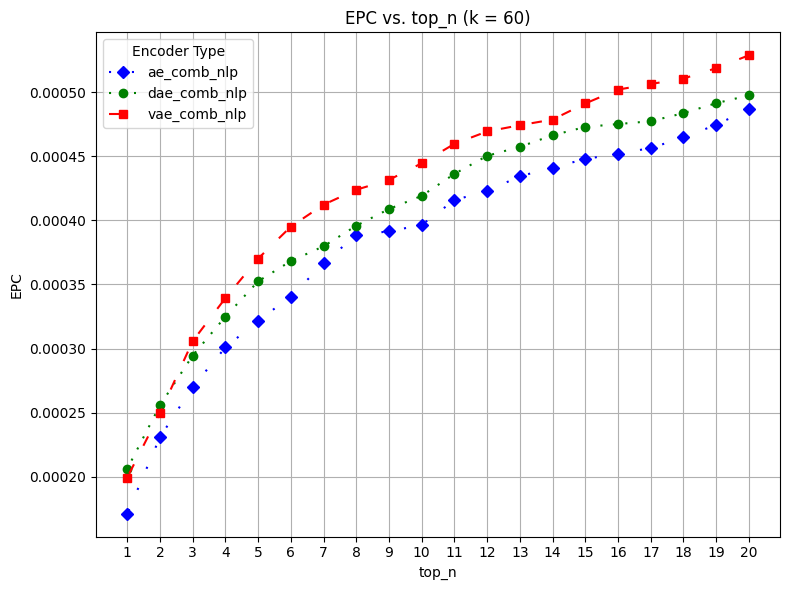

In [18]:
import matplotlib.pyplot as plt

# Filter data for k = 60
filtered_k60 = final_df[final_df["k"] == 60]

# Set up the plot
plt.figure(figsize=(8, 6))

# Markers, colors, and linestyles
markers = ['D', 'o', 's', '^', 'v', '*']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]

# Plot one line per encoder_type
for i, encoder in enumerate(filtered_k60["encoder_type"].unique()):
    subset = filtered_k60[filtered_k60["encoder_type"] == encoder]
    plt.plot(subset["top_n"], subset["EPC_next"],
             label=encoder + "_comb_nlp",
             marker=markers[i % len(markers)],
             color=colors[i % len(colors)],
             linestyle=custom_linestyles[i % len(custom_linestyles)]
            )
    
# Customize plot
plt.title('EPC vs. top_n (k = 60)')
plt.xlabel('top_n')
plt.ylabel('EPC')
plt.xticks(range(1, 21, 1))  # Force x-axis ticks from 1 to 20
plt.legend(title='Encoder Type')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [19]:
Fig_9_lacic = pd.read_csv(r'../../data/Lacic/Synthetic_EPC_Data__k_60_.csv')
print(Fig_9_lacic['encoder_type'].unique())
print("len(Fig_9_lacic)")
print(len(Fig_9_lacic))
Fig_9_lacic.head()

['VAE_Comb' 'VAE_Int' 'Bayes' 'sKNN' 'iKNN' 'S-sKNN' 'V-sKNN' 'GRU4Rec'
 'POP' 'BPR-MF' 'pRNN']
len(Fig_9_lacic)
220


k encoder_type     EPC  top_n
0  60     VAE_Comb  0.0090      1
1  60     VAE_Comb  0.0100      2
2  60     VAE_Comb  0.0098      3
3  60     VAE_Comb  0.0095      4
4  60     VAE_Comb  0.0092      5

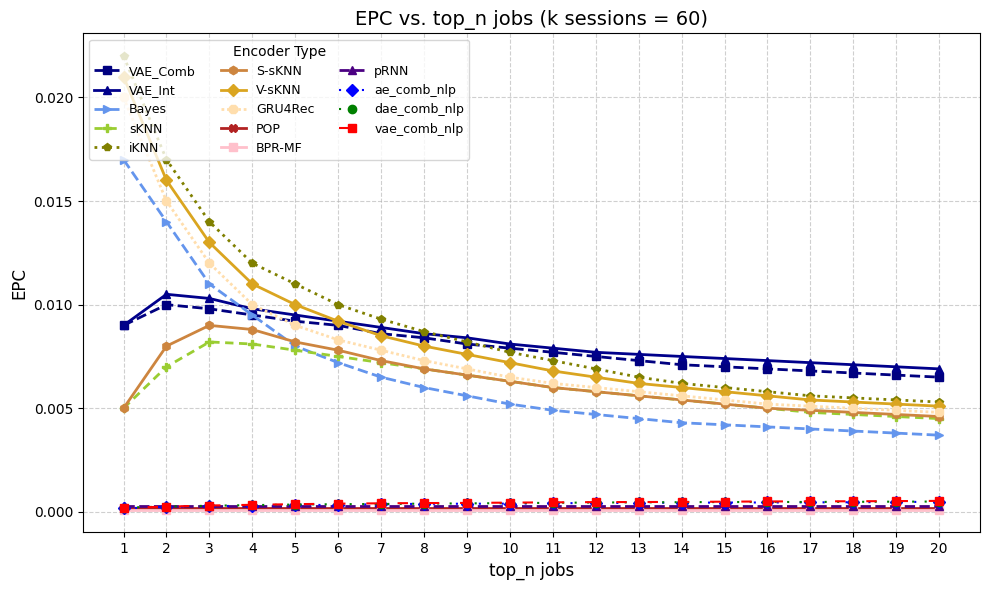

In [20]:
import matplotlib.pyplot as plt

# Filter data for k = 60
Fig_9_lacic = Fig_9_lacic #final_df[final_df["k"] == 60]

# Set up the plot
plt.figure(figsize=(10, 6))

# Define custom styles like in the image
custom_styles = {
    "VAE_Comb":     {'marker': 's', 'linestyle': '--', 'color': 'navy'},
    "VAE_Int":      {'marker': '^', 'linestyle': '-',  'color': 'darkblue'},
    "Bayes":        {'marker': '>', 'linestyle': '--', 'color': 'cornflowerblue'},
    "sKNN":         {'marker': 'P', 'linestyle': (0, (3, 2)), 'color': 'yellowgreen'},
    "iKNN":         {'marker': 'p', 'linestyle': ':',  'color': 'olive'},
    "S-sKNN":       {'marker': 'h', 'linestyle': '-',  'color': 'peru'},
    "V-sKNN":       {'marker': 'D', 'linestyle': '-',  'color': 'goldenrod'},
    "GRU4Rec":      {'marker': '8', 'linestyle': (0, (1, 1)), 'color': 'navajowhite'},
    "POP":          {'marker': 'X', 'linestyle': '-',  'color': 'firebrick'},
    "BPR-MF":       {'marker': 's', 'linestyle': '-',  'color': 'pink'},
    "pRNN":         {'marker': '^', 'linestyle': '--', 'color': 'indigo'}
}

# Plot each encoder_type with style
for encoder in Fig_9_lacic["encoder_type"].unique():
    subset = Fig_9_lacic[Fig_9_lacic["encoder_type"] == encoder]
    style = custom_styles.get(encoder, {'marker': 'o', 'linestyle': '-', 'color': 'black'})
    plt.plot(
        subset["top_n"], subset["EPC"],
        label=encoder,
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        linewidth=2
    )

# Markers, colors, and linestyles
markers = ['D', 'o', 's', '^', 'v', '*']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
custom_linestyles = [
    (0, (1, 10)),   # loosely dotted
    (0, (1, 5)),    # dotted
    (0, (5, 10)),
    (0, (1, 10)),
    (0, (1, 5)),
    (0, (5, 10))
]

# Plot one line per encoder_type
for i, encoder in enumerate(filtered_k60["encoder_type"].unique()):
    subset = filtered_k60[filtered_k60["encoder_type"] == encoder]
    plt.plot(subset["top_n"], subset["EPC_next"],
             label=encoder + "_comb_nlp",
             marker=markers[i % len(markers)],
             color=colors[i % len(colors)],
             linestyle=custom_linestyles[i % len(custom_linestyles)]
            )
    
# Axis & legend styling
plt.title('EPC vs. top_n jobs (k sessions = 60)', fontsize=14)
plt.xlabel('top_n jobs', fontsize=12)
plt.ylabel('EPC', fontsize=12)
plt.xticks(range(1, 21, 1))  # Show ticks from 1 to 20
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Encoder Type', fontsize=9, title_fontsize=10, ncol=3, loc='upper left')
plt.tight_layout()
# Save the plot
plt.savefig("Fig_9.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()


## Global plots from my study

In [21]:
final_df = pd.read_csv(evaluation_path+"summary_all_metrics.csv")
final_df.head()

nDCG_next  MRR_next  EPC_next      EPD_next  nDCG_remaining  MRR_remaining  \
0   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
1   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
2   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
3   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   
4   0.026155  0.020224  0.002303 -8.695465e-21        0.185111       0.197461   

   EPC_remaining  EPD_remaining encoder_type  top_n   k  CatalogCoverage (%)  \
0       0.045614       0.021597           ae     20  10                 9.27   
1       0.045614       0.021597           ae     19  10                 9.27   
2       0.045614       0.021597           ae     18  10                 9.27   
3       0.045614       0.021597           ae     17  10                 9.27   
4       0.045614       0.021597           ae     16  10                 9.27   

   TestsetCoverage (%)  
0                58.86  
1                58.86  
2                58.86  
3                58.86  
4                58.86

### nDCG

<IPython.core.display.Javascript object>


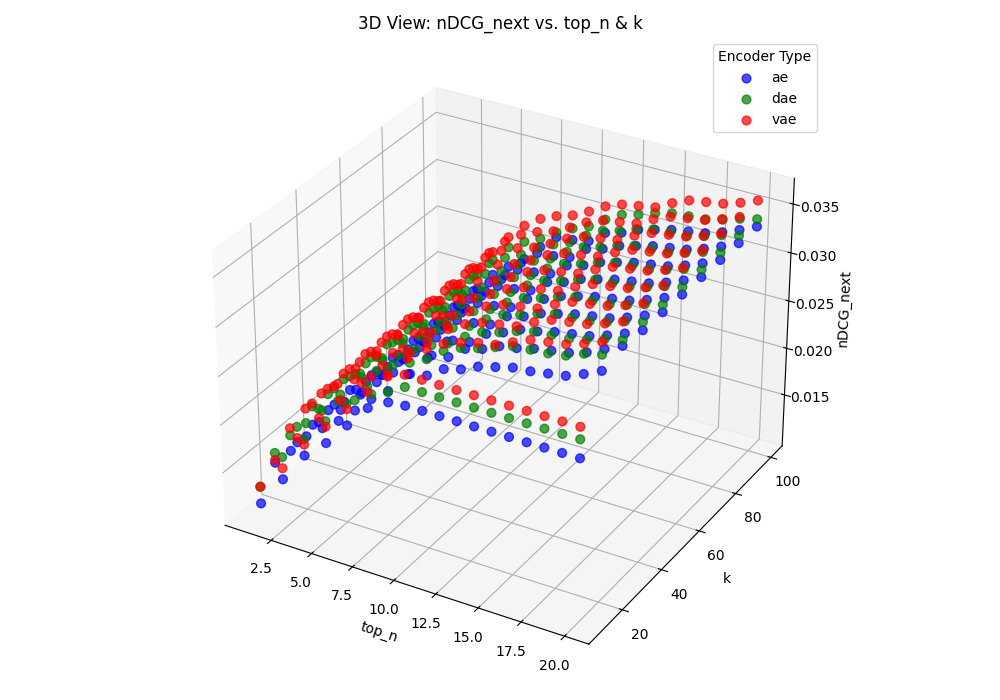

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'nDCG_next'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


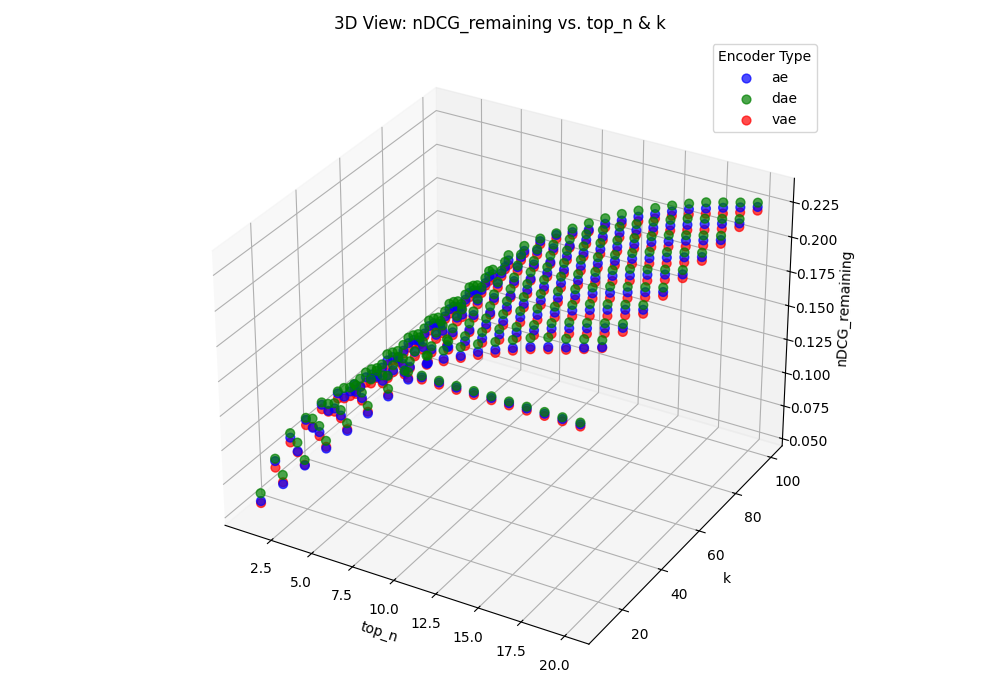

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'nDCG_remaining'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


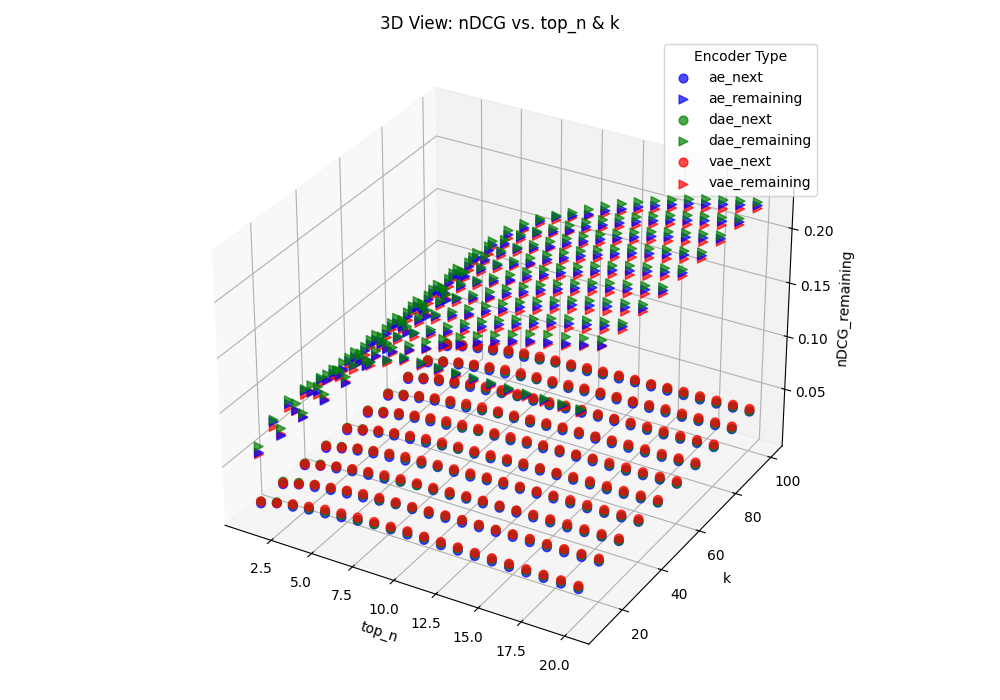

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset['nDCG_next']
    
    ax.scatter(x, y, z,
               label=encoder + "_next",
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)
    
    z = subset['nDCG_remaining']
    
    ax.scatter(x, y, z,
               label=encoder+"_remaining",
               marker='>',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: nDCG vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


### MRR

<IPython.core.display.Javascript object>


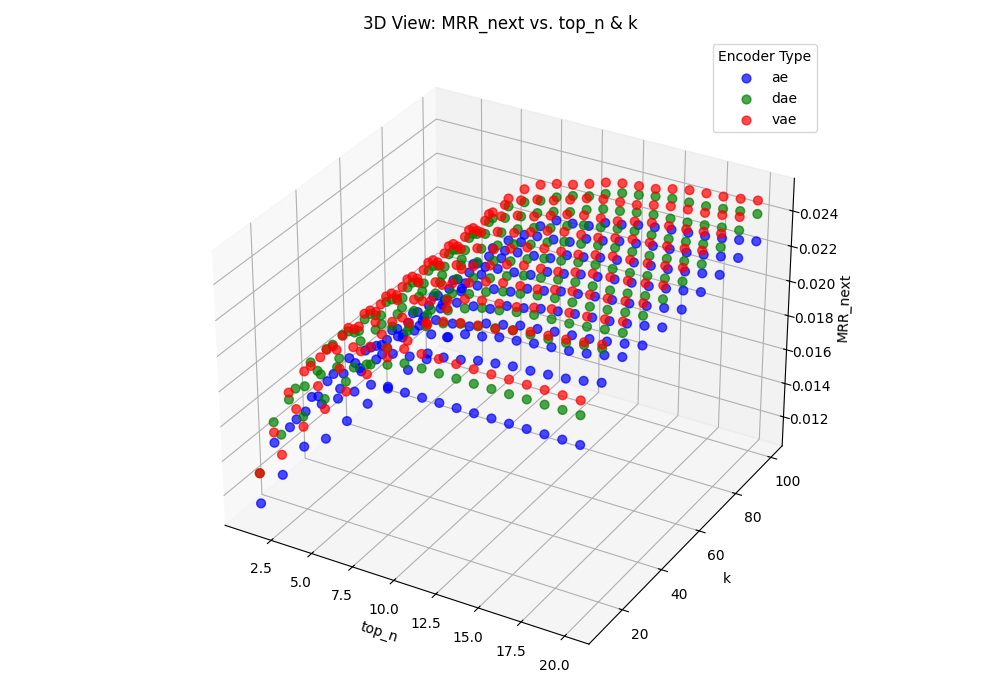

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'MRR_next'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


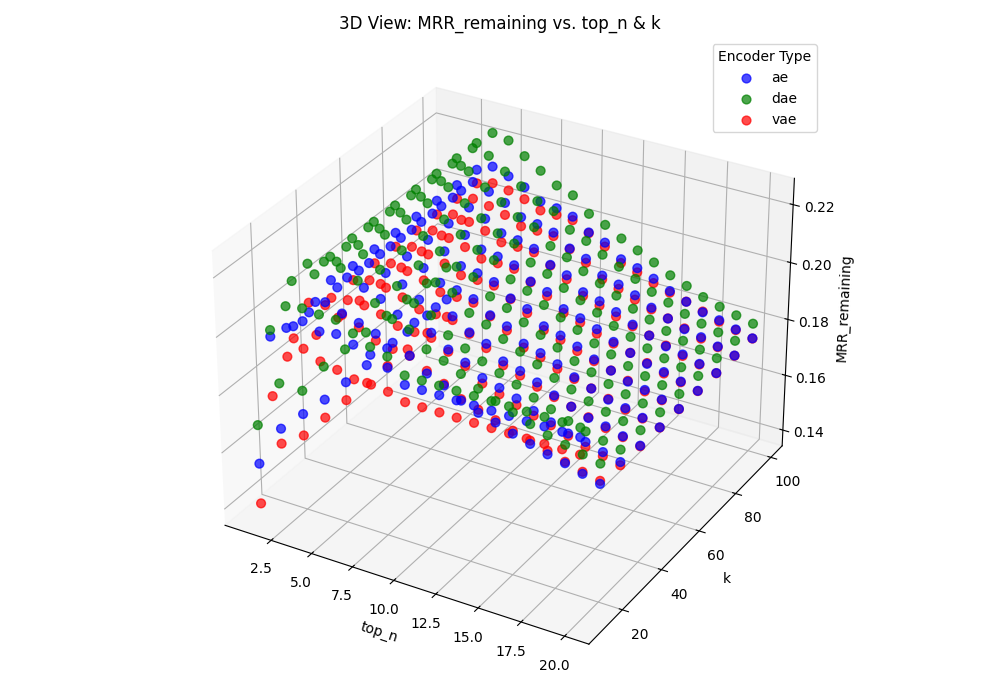

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'MRR_remaining'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


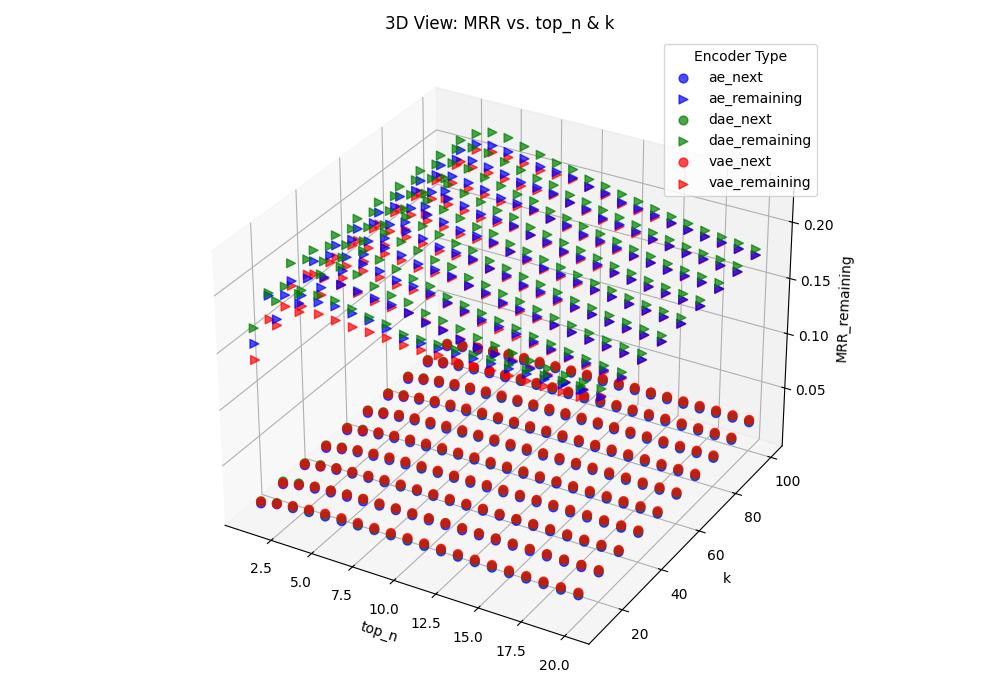

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset['MRR_next']
    
    ax.scatter(x, y, z,
               label=encoder + "_next",
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)
    
    z = subset['MRR_remaining']
    
    ax.scatter(x, y, z,
               label=encoder+"_remaining",
               marker='>',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: MRR vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


### EPC

<IPython.core.display.Javascript object>


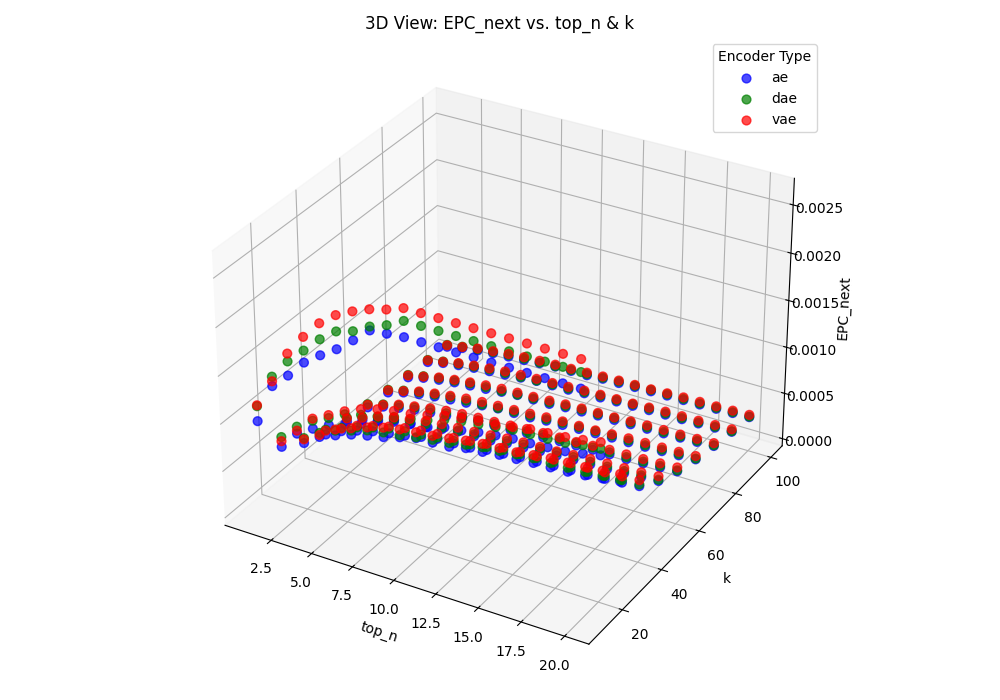

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'EPC_next'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


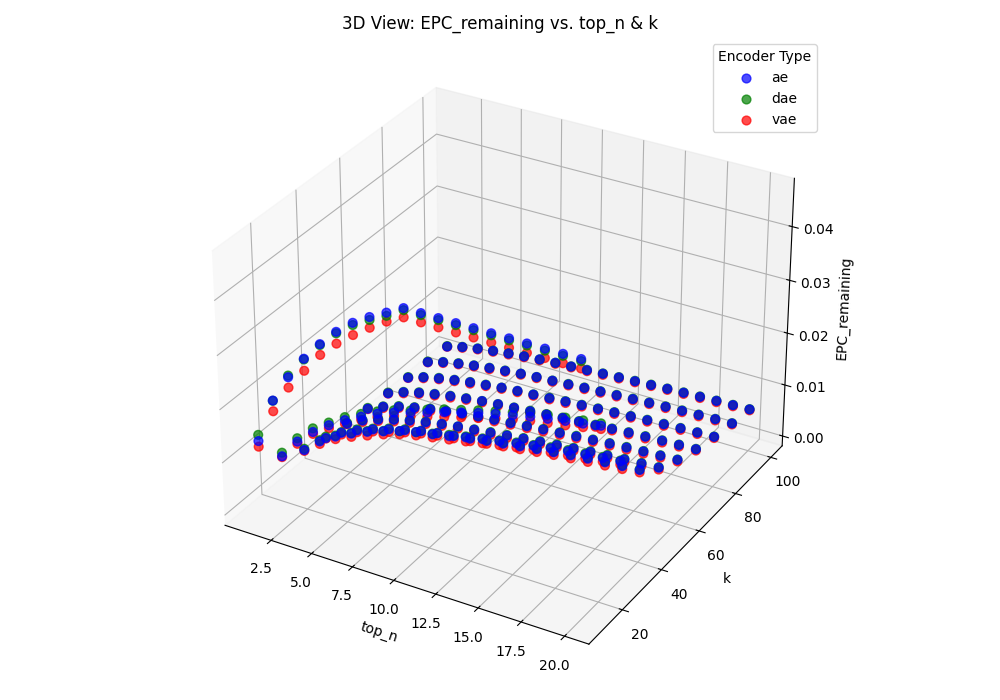

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'EPC_remaining'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


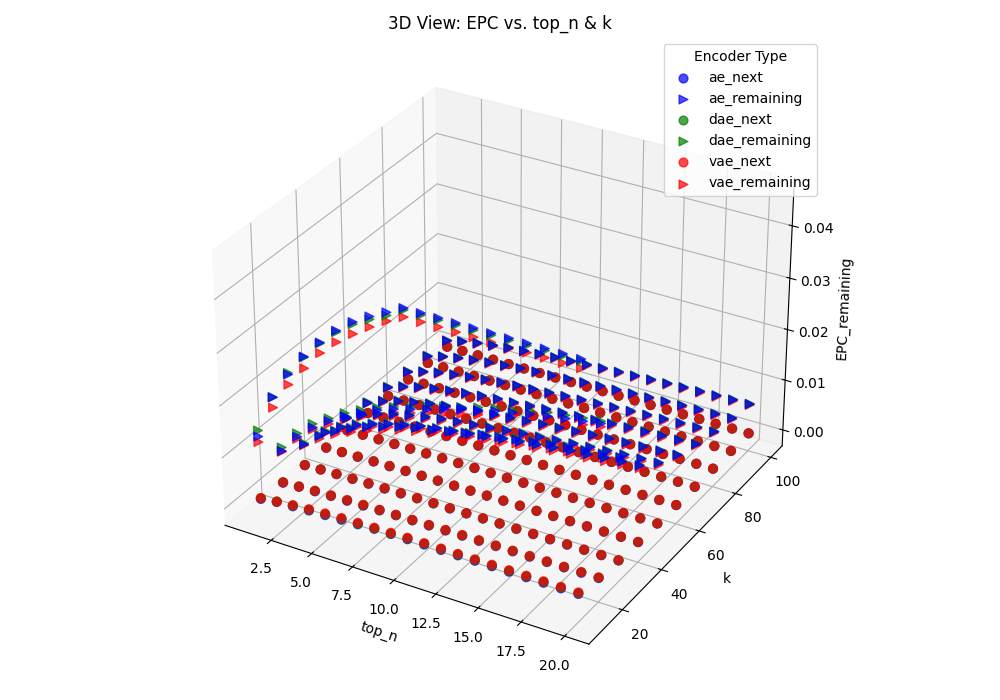

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset['EPC_next']
    
    ax.scatter(x, y, z,
               label=encoder + "_next",
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)
    
    z = subset['EPC_remaining']
    
    ax.scatter(x, y, z,
               label=encoder+"_remaining",
               marker='>',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: EPC vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


### EPD

<IPython.core.display.Javascript object>


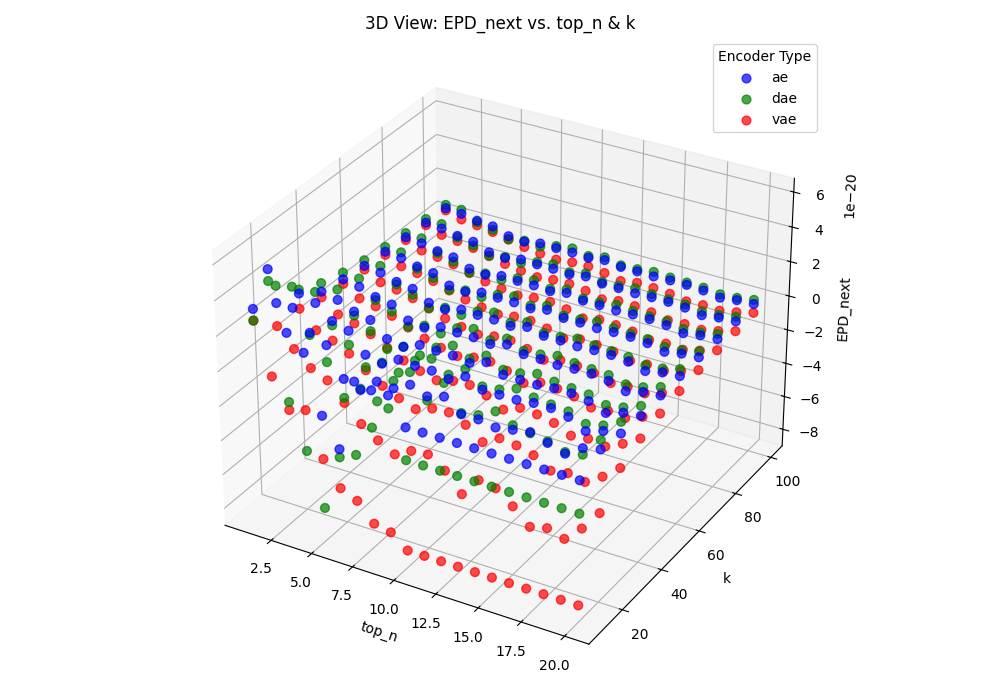

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'EPD_next'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


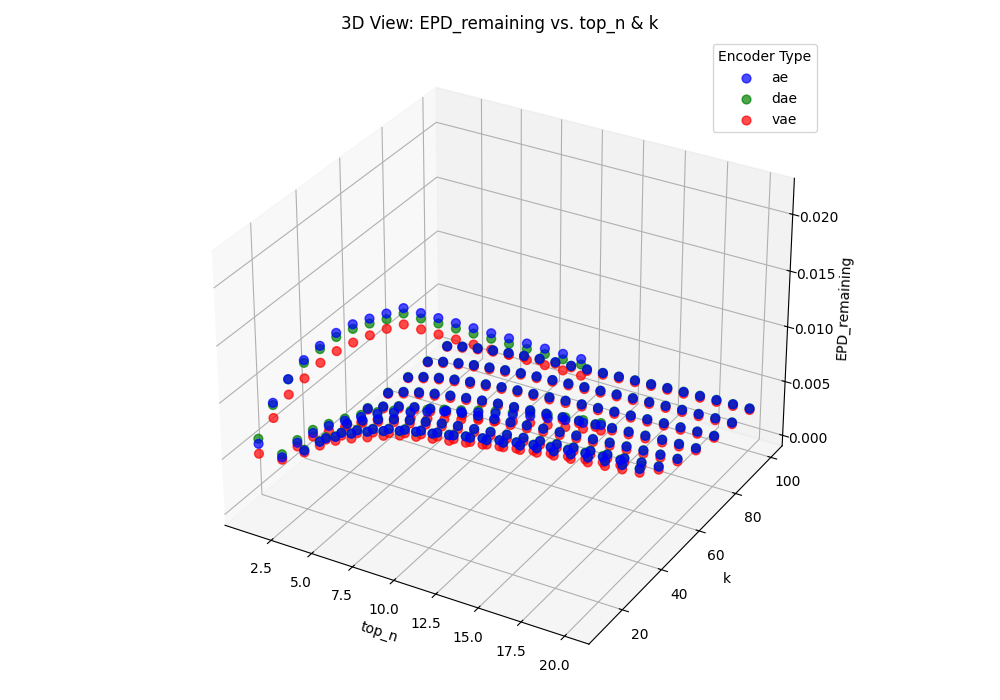

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'EPD_remaining'  # or 'nDCG_remaining'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


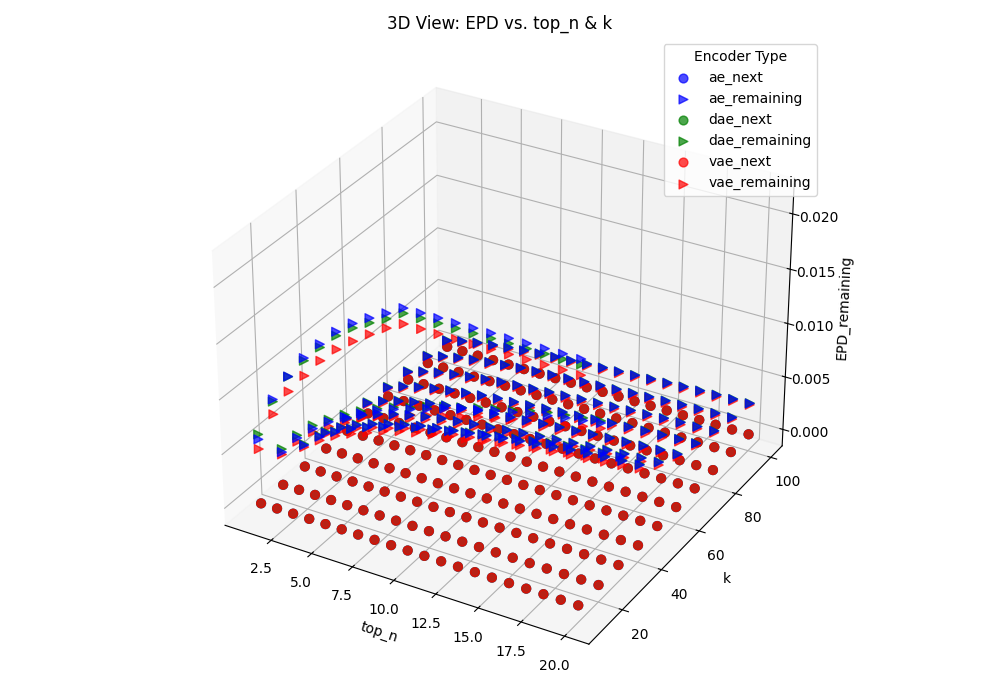

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset['EPD_next']
    
    ax.scatter(x, y, z,
               label=encoder + "_next",
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)
    
    z = subset['EPD_remaining']
    
    ax.scatter(x, y, z,
               label=encoder+"_remaining",
               marker='>',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: EPD vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


### Coverage

<IPython.core.display.Javascript object>


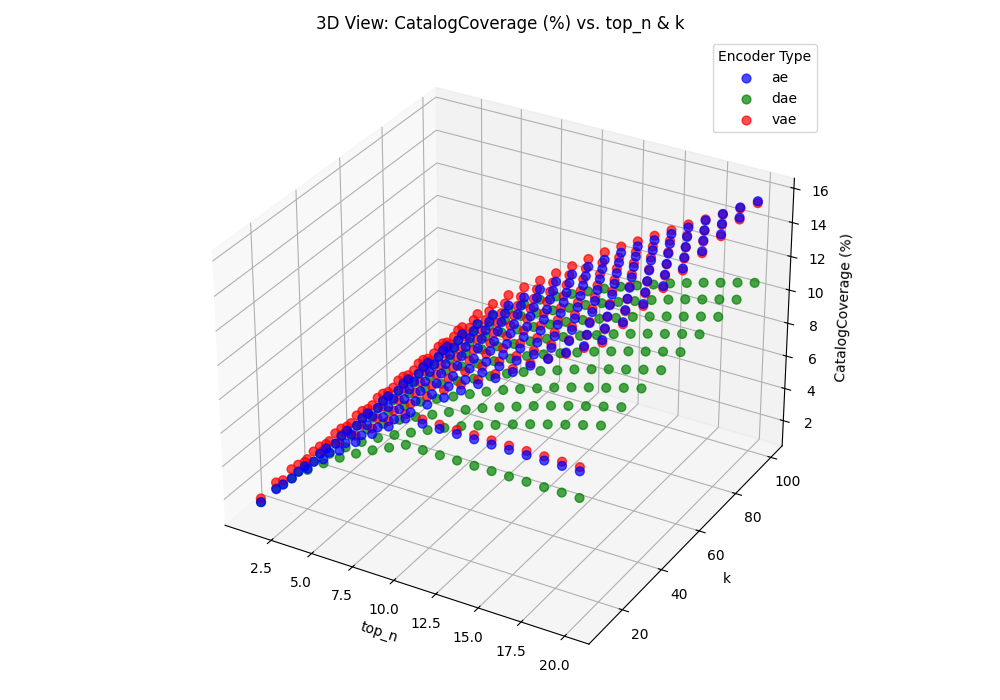

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'CatalogCoverage (%)'  # or 'TestsetCoverage (%'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


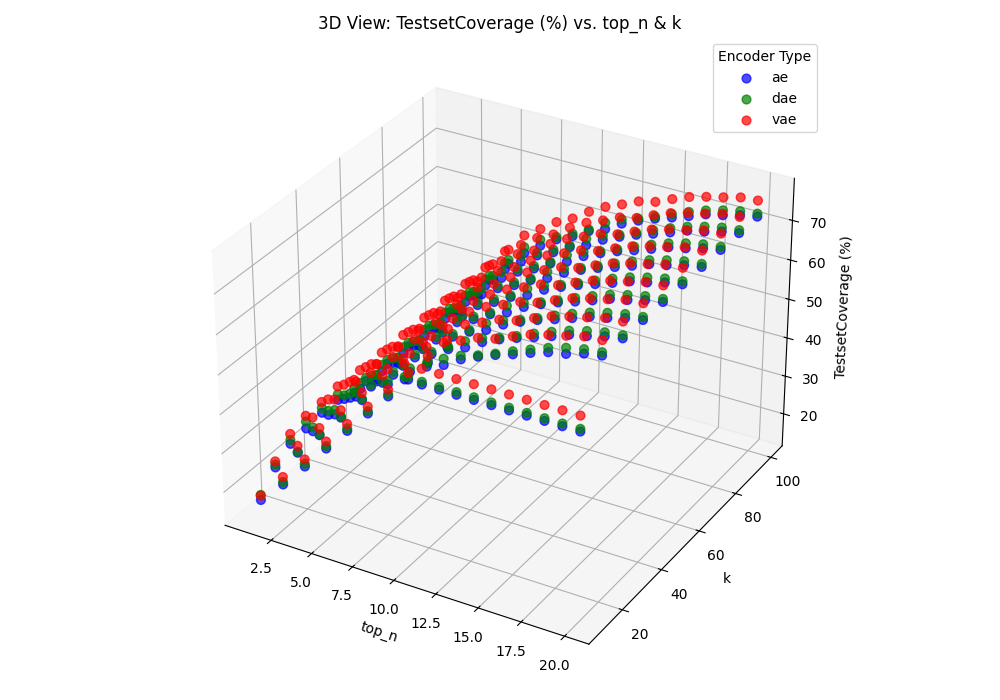

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'TestsetCoverage (%)'  # or 'TestsetCoverage (%)'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset[metric]
    
    ax.scatter(x, y, z,
               label=encoder,
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: {metric} vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()


<IPython.core.display.Javascript object>


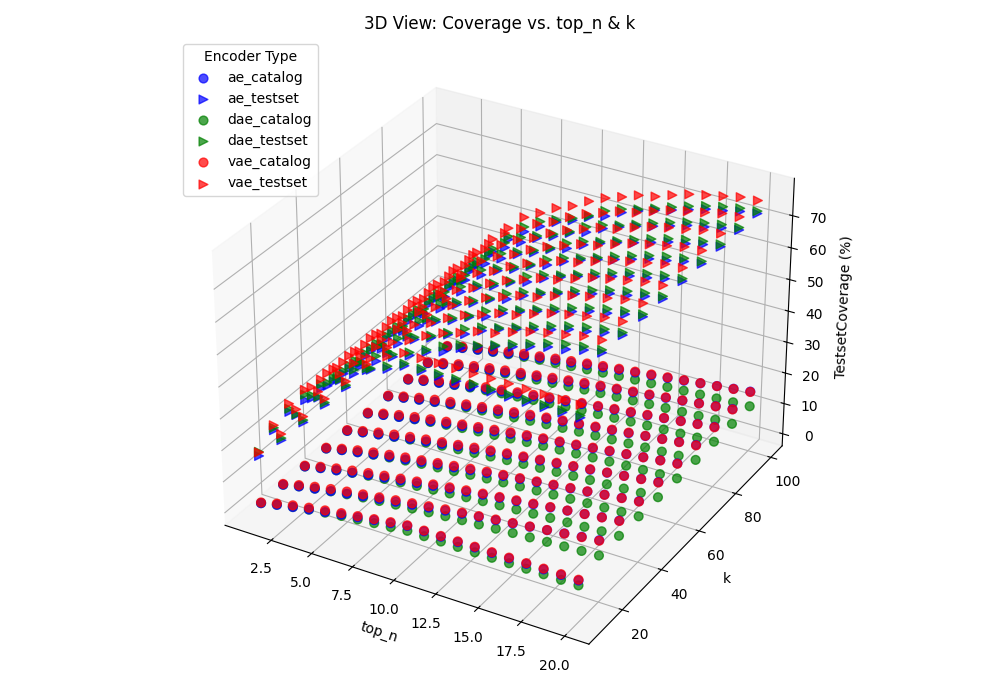

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose the metric: either nDCG_next or nDCG_remaining
metric = 'TestsetCoverage (%)'  # or 'CatalogCoverage (%)'

# Optional: filter to relevant encoders or loop over them
for i, encoder in enumerate(final_df["encoder_type"].unique()):
    subset = final_df[final_df["encoder_type"] == encoder]
    
    x = subset["top_n"]
    y = subset["k"]
    z = subset['CatalogCoverage (%)']
    
    ax.scatter(x, y, z,
               label=encoder + "_catalog",
               marker='o',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)
    
    z = subset['TestsetCoverage (%)']
    
    ax.scatter(x, y, z,
               label=encoder+"_testset",
               marker='>',
               color=colors[i % len(colors)],
               s=40, alpha=0.7)

# Customize the plot
ax.set_title(f'3D View: Coverage vs. top_n & k')
ax.set_xlabel('top_n')
ax.set_ylabel('k')
ax.set_zlabel(metric)
ax.legend(title="Encoder Type")
plt.tight_layout()

# Show the 3D plot
plt.show()
